In [1]:
import os
import tensorflow
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import random

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [4]:
train_images=[]
train_labels=[]
val_images=[]
val_labels=[]
random_seed=42

In [5]:
print(os.listdir("/kaggle/input/animal-faces/afhq/train"))

['dog', 'wild', 'cat']


In [6]:
train_dir = '/kaggle/input/animal-faces/afhq/train'
valid_dir = '/kaggle/input/animal-faces/afhq/val'

In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
predict_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [8]:
# 훈련 데이터 제너레이터
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# 검증 데이터 제너레이터
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [12]:
base_model=VGG16(weights='imagenet',include_top=True)

553467096/553467096 [==============================] - 3s 0us/step


In [13]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model = Sequential()
model.add(base_model)
model.add(Dense(3, activation='softmax'))
for layer in base_model.layers:
    layer.trainable = False

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 3)                 3003      
                                                                 
Total params: 138360547 (527.80 MB)
Trainable params: 3003 (11.73 KB)
Non-trainable params: 138357544 (527.79 MB)
_________________________________________________________________


In [16]:
from keras.optimizers import Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
# model.fit(train_generator, epochs=10, validation_data=valid_generator)
history = model.fit(train_generator, epochs=30, validation_data=valid_generator)

Epoch 1/30
458/458 [==============================] - 317s 659ms/step - loss: 0.9237 - accuracy: 0.9242 - val_loss: 0.7635 - val_accuracy: 0.9927
Epoch 2/30
458/458 [==============================] - 206s 450ms/step - loss: 0.6425 - accuracy: 0.9956 - val_loss: 0.5334 - val_accuracy: 0.9927
Epoch 3/30
458/458 [==============================] - 206s 449ms/step - loss: 0.4552 - accuracy: 0.9947 - val_loss: 0.3820 - val_accuracy: 0.9927
Epoch 4/30
458/458 [==============================] - 204s 445ms/step - loss: 0.3311 - accuracy: 0.9953 - val_loss: 0.2820 - val_accuracy: 0.9933
Epoch 5/30
458/458 [==============================] - 204s 446ms/step - loss: 0.2467 - accuracy: 0.9958 - val_loss: 0.2143 - val_accuracy: 0.9933
Epoch 6/30
458/458 [==============================] - 208s 454ms/step - loss: 0.1880 - accuracy: 0.9958 - val_loss: 0.1673 - val_accuracy: 0.9933
Epoch 7/30
458/458 [==============================] - 204s 445ms/step - loss: 0.1474 - accuracy: 0.9954 - val_loss: 0.1339 -

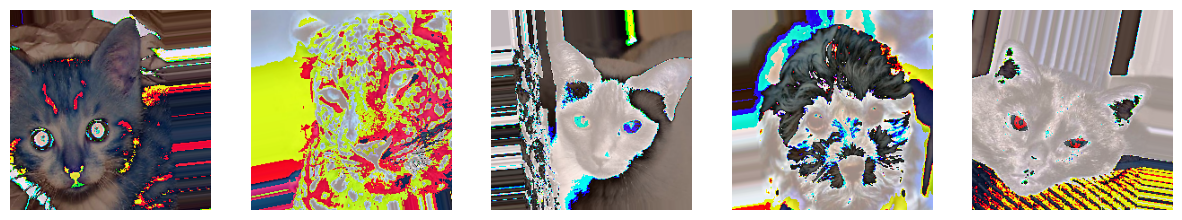

In [18]:
augmented_images = train_generator.next()[0]
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    axes[i].imshow(augmented_images[i].astype('uint8'))
    axes[i].axis('off')

plt.show()

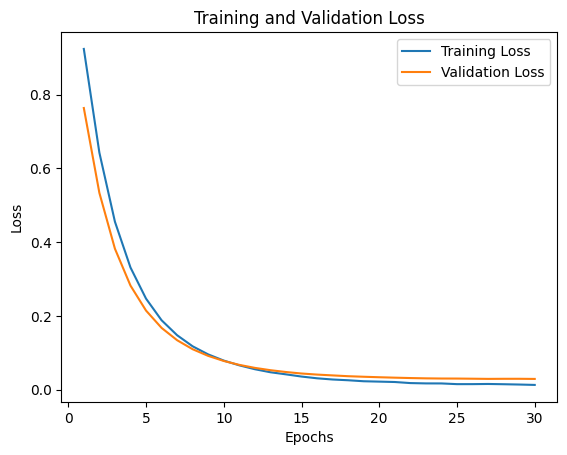

In [19]:
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss,  label='Training Loss')
plt.plot(epochs, valid_loss,  label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [20]:
test_loss, test_accuracy = model.evaluate(valid_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

47/47 [==============================] - 7s 141ms/step - loss: 0.0289 - accuracy: 0.9927
Test Loss: 0.028896935284137726, Test Accuracy: 0.9926666617393494


In [21]:
predict_generator = predict_datagen.flow_from_directory(
    '/kaggle/input/predict-set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 6 images belonging to 3 classes.


In [22]:
predictions = model.predict(predict_generator)


1/1 [==============================] - 0s 227ms/step


In [23]:
for i in range(len(predict_generator.filenames)):
    image_path = predict_generator.filepaths[i]
    true_label = predict_generator.classes[i]
    print(image_path,true_label)

/kaggle/input/predict-set/cat/Test_img3.jpg 0
/kaggle/input/predict-set/cat/Test_img4.jpg 0
/kaggle/input/predict-set/dog/Test_img2.jpg 1
/kaggle/input/predict-set/dog/test_img1.jpg 1
/kaggle/input/predict-set/wild/Test_img5.jpg 2
/kaggle/input/predict-set/wild/Test_img6.jpg 2


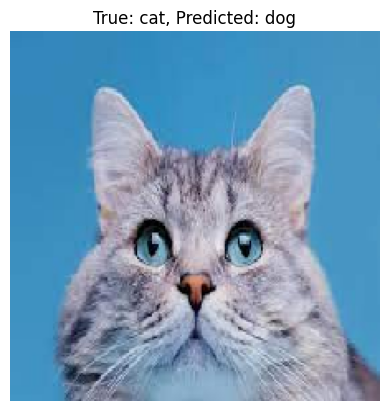

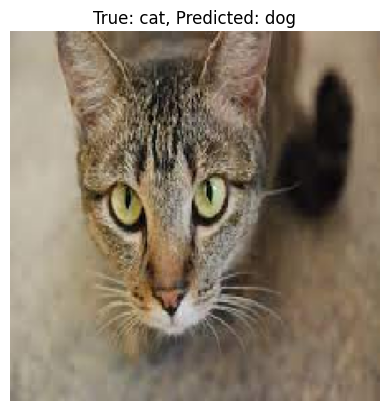

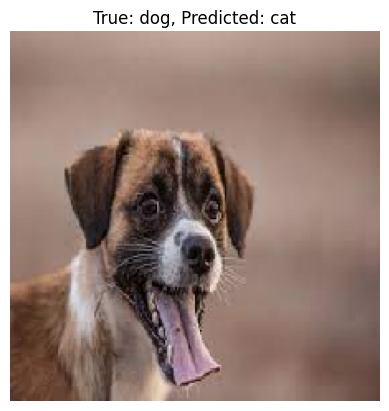

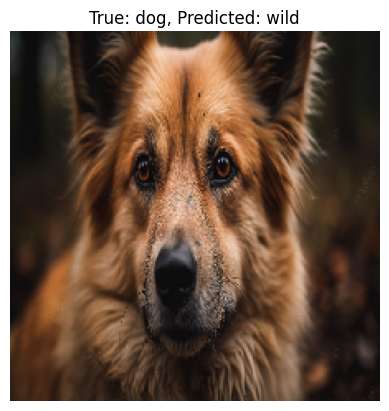

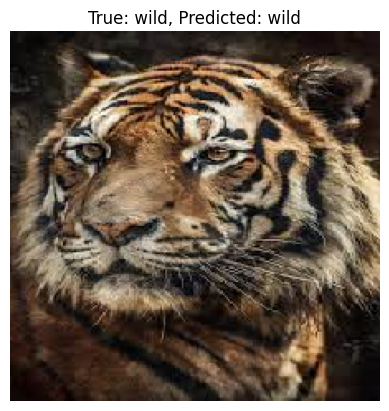

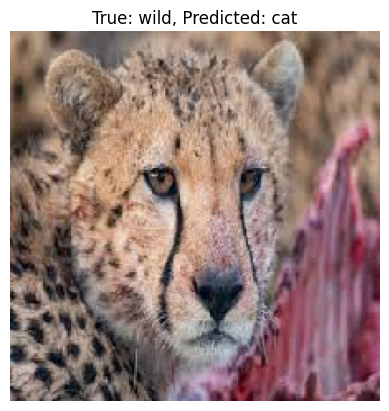

In [27]:
for i in range(len(predict_generator.filenames)):
    image_path = predict_generator.filepaths[i]
    true_label = predict_generator.classes[i]  # 정수 형태의 라벨
    predicted_label = np.argmax(predictions[i])  # 모델이 예측한 클래스의 인덱스

    # 이미지 불러오기 및 시각화
    img = image.load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')

    # 예측 결과 출력
    classes = ['cat', 'dog', 'wild']
    true_class = classes[true_label]
    predicted_class = classes[predicted_label]

    plt.title(f"True: {true_class}, Predicted: {predicted_class}")
    plt.show()

In [18]:
print(aaaaaaaaaaaaaaaaaa)#여기서 자동stop

NameError: name 'aaaaaaaaaaaaaaaaaa' is not defined

In [ ]:
# print('train data set')
# train_cat_path='/kaggle/input/animal-faces/afhq/train/cat'
# train_cat_img=[f for f in os.listdir(train_cat_path)]
# print(f'고양이 사진: {len(train_cat_img)}개')

# train_dog_path='/kaggle/input/animal-faces/afhq/train/dog'
# train_dog_img=[f for f in os.listdir(train_dog_path)]
# print(f'강아지 사진: {len(train_dog_img)}개')


# train_wild_path='/kaggle/input/animal-faces/afhq/train/wild'
# train_wild_img=[f for f in os.listdir(train_wild_path)]
# print(f'다른동물 사진: {len(train_wild_img)}개')

In [ ]:
# min_samples = min(len(train_cat_img), len(train_dog_img), len(train_wild_img))

# # 각 클래스에서 최소 샘플 수만큼 랜덤하게 선택하여 데이터셋 구성
# selected_cat_img = random.sample(train_cat_img, min_samples)
# selected_dog_img = random.sample(train_dog_img, min_samples)
# selected_wild_img = random.sample(train_wild_img, min_samples)

# train_set=[]
# for img_file in selected_cat_img:
#     img_path = os.path.join(train_cat_path, img_file)
#     img = image.load_img(img_path, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = preprocess_input(x)
#     train_set.append((x,0))  # 0은 고양이에 해당하는 라벨

# for img_file in selected_dog_img:
#     img_path = os.path.join(train_dog_path, img_file)
#     img = image.load_img(img_path, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = preprocess_input(x)
#     train_set.append((x,1))  # 1은 강아지에 해당하는 라벨

# for img_file in selected_wild_img:
#     img_path = os.path.join(train_wild_path, img_file)
#     img = image.load_img(img_path, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = preprocess_input(x)
#     train_set.append((x,2))  # 2는 다른 동물에 해당하는 라벨

# random.shuffle(train_set)
# # 리스트를 NumPy 배열로 변환
# train_images = np.array([item[0] for item in train_set])
# train_labels = np.array([item[1] for item in train_set])

In [ ]:
# num_samples_to_visualize = 5

# # 랜덤하게 몇 개의 인덱스 선택
# random_indices = np.random.choice(len(train_images), num_samples_to_visualize, replace=False)

# # 선택된 이미지와 라벨 시각화
# for i in random_indices:
#     img = train_images[i]
#     label = train_labels[i]

#     # 시각화
#     plt.figure(figsize=(2, 2))
#     plt.imshow(img)
#     plt.title(f"Label: {label}")
#     plt.axis('off')
#     plt.show()

In [ ]:
# print(f'train_image : {len(train_images)}개')
# print(f'train_label : {len(train_labels)}개')

In [ ]:
# print('validation data set')
# valid_path='/kaggle/input/animal-faces/afhq/val'

# valid_cat_path=os.path.join(valid_path, 'cat')
# valid_cat_img=[f for f in os.listdir(valid_cat_path)]
# print(f'고양이 사진: {len(valid_cat_img)}개')

# valid_dog_path=os.path.join(valid_path, 'dog')
# valid_dog_img=[f for f in os.listdir(valid_dog_path)]
# print(f'강아지 사진: {len(valid_dog_img)}개')

# valid_wild_path=os.path.join(valid_path, 'wild')
# valid_wild_img=[f for f in os.listdir(valid_wild_path)]
# print(f'다른동물 사진: {len(valid_wild_img)}개')

In [ ]:
# valid_set=[]
# for img_file in valid_cat_img:
#     img_path = os.path.join(valid_cat_path, img_file)
#     img = image.load_img(img_path, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = preprocess_input(x)
#     valid_set.append((x,0))  # 0은 고양이에 해당하는 라벨

# for img_file in valid_dog_img:
#     img_path = os.path.join(valid_dog_path, img_file)
#     img = image.load_img(img_path, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = preprocess_input(x)
#     valid_set.append((x,1))  # 1은 강아지에 해당하는 라벨

# for img_file in valid_wild_img:
#     img_path = os.path.join(valid_wild_path, img_file)
#     img = image.load_img(img_path, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = preprocess_input(x)
#     valid_set.append((x,2))  # 2는 다른 동물에 해당하는 라벨

# random.shuffle(train_set)
# # 리스트를 NumPy 배열로 변환
# valid_images = np.array([item[0] for item in valid_set])
# valid_labels = np.array([item[1] for item in valid_set])

In [ ]:
# print(len(valid_images))
# print(len(valid_labels))

In [ ]:
# random_indices = np.random.choice(len(valid_images), num_samples_to_visualize, replace=False)

# # 선택된 이미지와 라벨 시각화
# for i in random_indices:
#     img = valid_images[i]
#     label = valid_labels[i]

#     # 시각화
#     plt.figure(figsize=(2, 2))
#     plt.imshow(img)
#     plt.title(f"Label: {label}")
#     plt.axis('off')
#     plt.show()

In [ ]:
# base_model=VGG16(weights='imagenet',include_top=True)

In [ ]:
# base_model.summary()

In [ ]:
# model = Sequential()
# model.add(base_model)
# model.add(Dense(3, activation='softmax'))
# for layer in base_model.layers:
#     layer.trainable = False

In [ ]:
# model.summary()

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     preprocessing_function=preprocess_input
# )

In [ ]:
# from keras.optimizers import Adam
# model.compile(optimizer=Adam(lr=0.001), 
#               loss='sparse_categorical_crossentropy', metrics=['accuracy', 'val_loss'])

In [ ]:
# history = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=10, batch_size=16)
# test_loss, test_accuracy = model.evaluate(test_images, test_labels)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')